## Применение метода главных компонент для сжатия изображений

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import datasets

Загрузим известный набор данных [MNIST](https://en.wikipedia.org/wiki/MNIST_database) &mdash; базу данных рукописных цифр. 

Он входит как встроенный датасет в библиотеку **sklearn**.

In [3]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

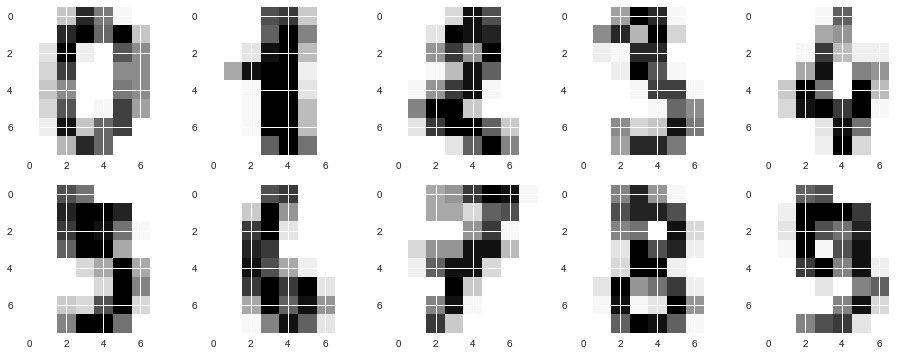

In [5]:
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i, :].reshape([8, 8])); # imshow() рисует изображение по матрице пикселей

In [11]:
X

array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

Исходная матрица признаков для каждого объекта-картинки имеет 64 столбца.

Попробуем сократить их число до 2 и посмотрим, что из этого получится.

In [10]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
X_reduced

array([[ -1.25946362,  21.27489134],
       [  7.95760554, -20.76870466],
       [  6.9919214 ,  -9.9559932 ],
       ..., 
       [ 10.80129219,  -6.96023801],
       [ -4.87210668,  12.42395215],
       [ -0.34437734,   6.36556455]])

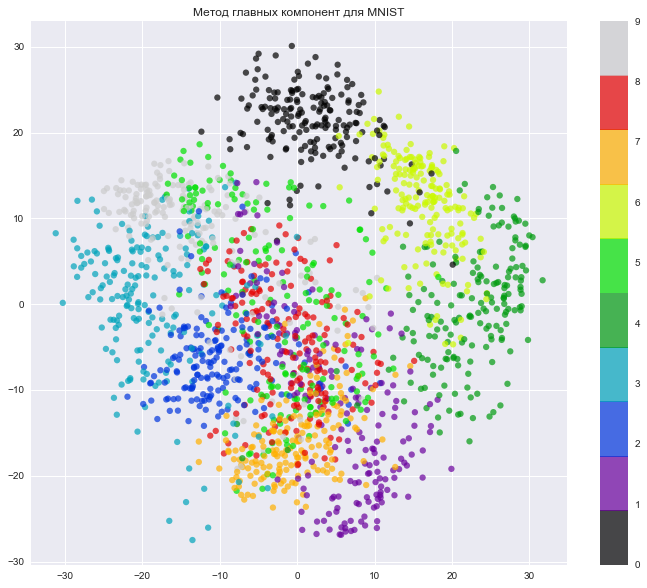

In [14]:
plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('Метод главных компонент для MNIST');

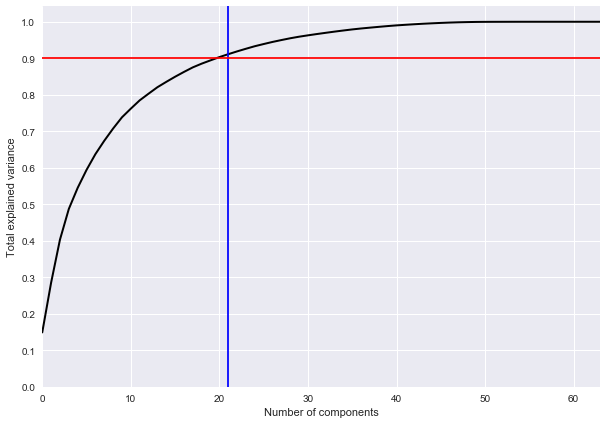

In [12]:
pca = PCA().fit(X)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 63)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(21, c='b')
plt.axhline(0.9, c='r')
plt.show();